In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
df = pd.read_csv("Cleaned (Final Data).csv")
df.head()

,ear,mar,target
0,0.18,0.48,1
1,0.33,0.46,0
2,0.40,0.40,0
3,0.36,0.44,0
4,0.46,0.39,0


<Figure size 800x640 with 0 Axes>

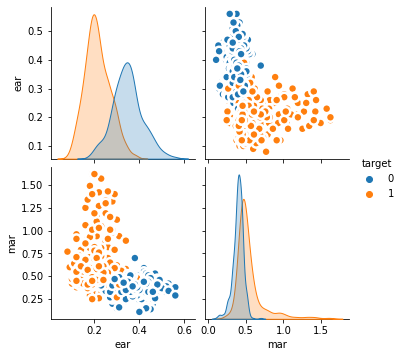

In [11]:
# Load Dataset
#df = sns.load_dataset('iris')

# Plot
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

<Figure size 800x640 with 0 Axes>

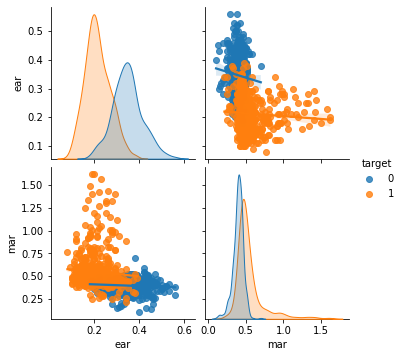

In [12]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="target")
plt.show()

### Classification

In [13]:
model= ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'KNN', 'SVM']
accuracies = []

In [14]:
# Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [15]:
x = df.drop('target', axis =1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predictions_log = logmodel.predict(X_test)
accuracy_score(y_test,predictions_log)

0.8753709198813057

In [16]:
accuracies.append(100*accuracy_score(y_test,predictions_log))

In [17]:
# Decision Tree

from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

predictions_dt = model_dt.predict(X_test)
accuracy_score(y_test,predictions_dt)



0.8486646884272997

In [18]:
accuracies.append(100*accuracy_score(y_test,predictions_dt))

In [19]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 100)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)
accuracy_score(y_test,predictions_rf)



0.8694362017804155

In [20]:
accuracies.append(100*accuracy_score(y_test,predictions_rf))

In [21]:
accuracies

[87.53709198813057, 84.86646884272997, 86.94362017804154]

In [22]:
# Navie Bayes

from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
predictions_nb = model_nb.predict(X_test)
accuracy_score(y_test, predictions_nb)

0.8694362017804155

In [23]:
accuracies.append(100*accuracy_score(y_test,predictions_nb))

In [24]:
# KNN 

# Model
from sklearn.neighbors import KNeighborsClassifier
index = []
acc_score = []
print(type(acc_score))

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions_knn = knn.predict(X_test)
    index.append(i)
    acc_score.append(accuracy_score(y_test, predictions_knn))
    #acc_score[i]= accuracy_score(y_test, predictions_knn)
    #score = cross_val_score(knn, df_feat, df['TARGET CLASS'], cv=10)
    #accuracy_rate.append(score.mean())

data = {'n':index, 'accuracy': acc_score}
df_knn_n = pd.DataFrame(data)

<class 'list'>


In [25]:
df_knn_n.head(20)

,n,accuracy
0,1,0.845697
1,2,0.872404
2,3,0.875371
3,4,0.881306
4,5,0.872404
5,6,0.893175
6,7,0.890208
7,8,0.884273
8,9,0.890208
9,10,0.875371


In [26]:
df_knn_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   n         39 non-null     int64  
 1   accuracy  39 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 752.0 bytes


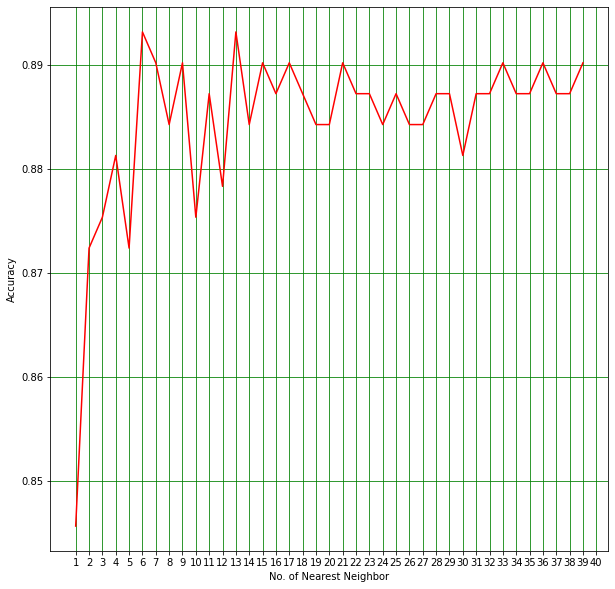

<Figure size 432x288 with 0 Axes>

In [27]:
import numpy as np
plt.figure(figsize=(10,10))
plt.plot(df_knn_n['n'],df_knn_n['accuracy'], color='r')
plt.xticks(np.arange(1,41,1))
plt.xlabel('No. of Nearest Neighbor')
plt.ylabel('Accuracy')
plt.grid(axis='both', color='g')
plt.show()
plt.savefig('n in knn.jpg', bbox_inches='tight')

In [28]:
model_knn = KNeighborsClassifier(n_neighbors = 6) # k=1

#Fitting
model_knn.fit(X_train,y_train)
predictions_knn = model_knn.predict(X_test)
accuracy_score(y_test, predictions_knn)


0.8931750741839762

In [29]:
accuracies.append(100*accuracy_score(y_test,predictions_knn))

In [30]:
# SVM

from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)
accuracy_score(y_test, predictions_svm)

0.884272997032641

In [31]:
accuracies.append(100*accuracy_score(y_test,predictions_svm))

In [32]:
accuracies

[87.53709198813057,
 84.86646884272997,
 86.94362017804154,
 86.94362017804154,
 89.31750741839762,
 88.4272997032641]

In [33]:
dict_total = {'model': model, 'accuracy': accuracies}
df_total = pd.DataFrame(dict_total)
df_total.head(10)

,model,accuracy
0,Logistic Regression,87.537092
1,Decision Tree,84.866469
2,Random Forest,86.943620
3,Naive Bayes,86.943620
4,KNN,89.317507
5,SVM,88.427300


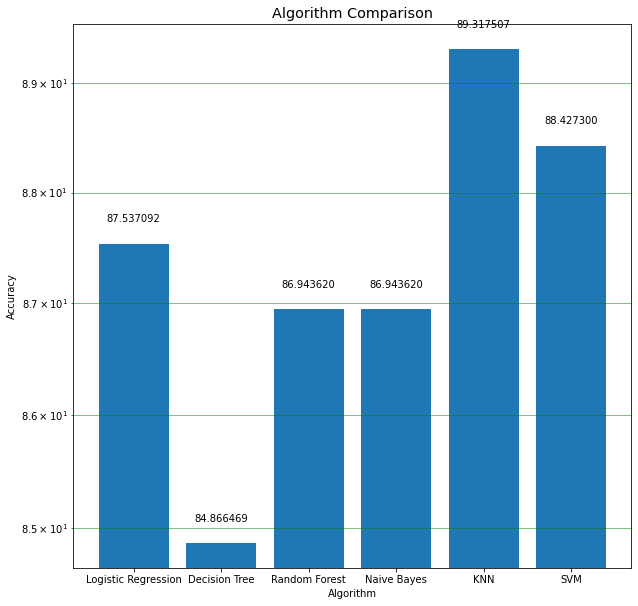

In [34]:
plt.figure(figsize=(10,10))

plt.semilogy()
plot = plt.bar(df_total['model'],df_total['accuracy']) #, marker='o', color='r')
plt.style.use('ggplot')

# for printing height 
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%f' % float(height), ha='center', va='bottom', color='black')

plt.title('Algorithm Comparison', color='black')
#plt.yticks(np.arange(0.8,0.9,100))
plt.xlabel('Algorithm', color='black')
plt.ylabel('Accuracy', color='black')
plt.grid(axis='y', which='both', alpha=0.6, color='green')
#(df_total['model'],df_total['accuracy'], marker='o', color='r')
plt.savefig('Model Comparison.jpg',bbox_inches='tight')
plt.show()

In [35]:
# Since KNN achieved the maximum accuracy, So saving KNN model
import pickle  
#KNN_saved = pickle.dumps(model_knn,'wb') 
filename = 'knn_model.sav'
pickle.dump(model_knn, open(filename, 'wb')) 

In [41]:
model = pickle.load(open(filename, 'rb'))
answer = model.predict([[0.8, 0.05]])
print(answer)

[0]


### Clustering

In [36]:
# K-Means Clustering

In [37]:
# Fuzzy Means Clustering

In [38]:
# Hierarchical Clustering